# Overview

1) Motivation

2) Definition of an Image

3) Equations of a straight line / Projections / Radon Transform / Computing Intersections

4) The continous 2D Fourier Transform

    a) definition

    b) how it is related to a 2D Fourier series

   c) the discrete case / sampling an image (2D function) at discrete points

   d) introducing aliased coefficients to explain how continous case and discrete case are related

5) Central slice theorem

6) How to compute sinograms

7) How to reconstruct (approximately) the image from its projections / Radon Transform

**Literature**

Search for these titles to obtain the PDF-documents.


1) Mathematics of medical imaging / Inverting the Radon Transform; Kailey Bolles

2) The Radon Transform and the Mathematics of Medical Imaging; Jen Beatty, Colby College

3) Medical Imaging Systems, An Introductory Guide; Publisher: Springer Open; Authors: A. Maier, S. Steidl, V. Christlein, J. Hornegger

4) Digital Reconstruction of Multidimensional Signals from their Projections; Authors: R.M. Mersereau , A.V. Oppenheim, Proceeding of the IEEE Vol. 62, No. 10 October 1974

# Motivation

the purpose of this notebook ...

# Definition of an image

An image is defined by a real valued function $f(x,y)$ depicted in the following figure:

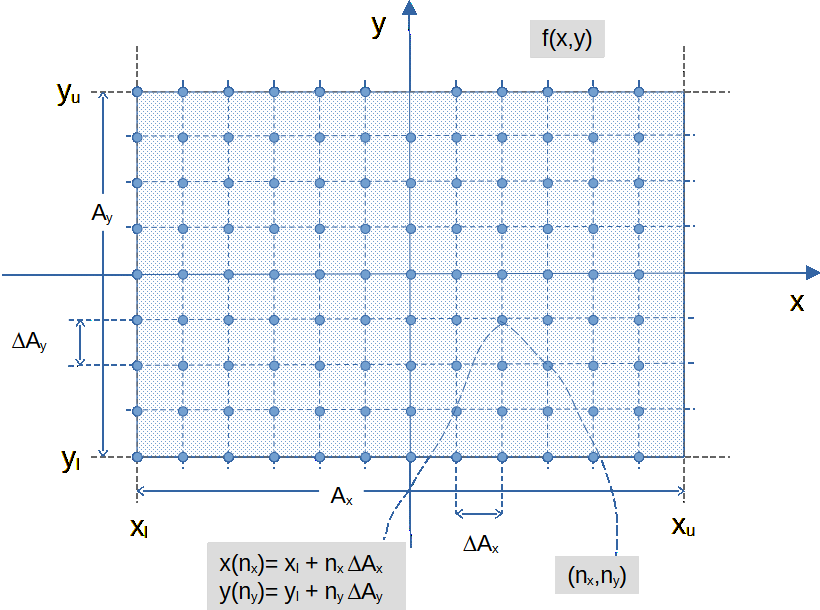

The figure is defined for the range of $x, y$ values

$$\begin{gather}
x_l \le x \lt x_u \\
y_l \le y \lt y_u
\end{gather}
$$

A discrete version of an image can be obtained by partitioning 

1) the interval $[x_l,\ x_u]$ into $N_x$ subintervals of equal length $\Delta A_x$

2) the interval $[y_l,\ y_u$ into $N_y$ subintervals of equal length $\Delta A_y$

With $\Delta A_x = (x_u - x_l)/N_x$ and $\Delta A_y = (y_u - y_l)/N_y$  the pixels of the discrete image are located at physical coordinates $x(n_x), y(n_y)$. Here $n_x, \ n_y$ are indices in the range 

$$\begin{gather}
0 \le n_x \le N_x-1 \\
0 \le n_y \le N_y-1
\end{gather}
$$


When we refer to the discrete image we will use the notation 

$$
f(x(n_x), y(n_y)) := f(n_x, n_y)
$$

The discrete image shall be interpreted as samples of the continous image $f(x,y)$ at point $x(n_x), \ y(n_y)$:

$$\begin{gather}
x(n_x) = x_l + n_x \cdot \Delta A_x \\
y(n_y) = y_l + n_y \cdot \Delta A_y
\end{gather}
$$



# Equations of a straight line

The figure show a straight line which intersects an image at points $x_1, y_1$ and $x_2, y_2$. Along the line between the intersection points a *line* integral is computed when dealing with the Radon Transform `RT`.

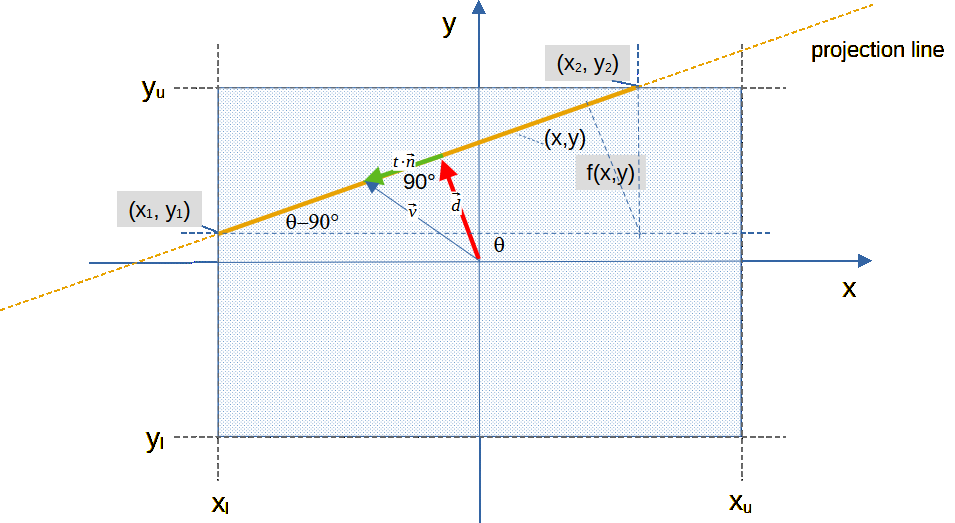

While there are quite a few ways to define lined a frequently use approach is to express the line by a vector equation:

$$
\vec{v} = \begin{pmatrix} x \\ y \end{pmatrix} = \underbrace{t \cdot \begin{pmatrix} cos\left( \theta \right) \\ sin\left( \theta \right) \end{pmatrix}}_{\vec{d}} + s \cdot \underbrace{\begin{pmatrix} -sin\left( \theta \right) \\ cos\left( \theta \right) \end{pmatrix}}_{\vec{n}}
$$

$$\begin{gather}
x(t,\ s) = t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right) \\
y(t, s) = t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right)
\end{gather}
$$


----

# Radon Transform

With this formulation of the line the projection or Radon Transform $R\left(t, \theta \right)$ is computed via a *line-integral*:

$$
R\left(t, \theta \right) = \int_{s_1}^{s_2} f\left(t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right), t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right) \right) \cdot ds
$$

**Note**

For a point $x_p, y_p$ on the line the values of $t$ and $s$ are determined for a given angle $\theta$.

$$
t = x_p \cdot cos\left( \theta \right) + y_p \cdot sin\left( \theta \right)
$$

$$
s = -x_p \cdot sin\left( \theta \right) + y_p \cdot cos\left( \theta \right)
$$

The last equation is used to determine the integration limits $s_1$ and $s_2$ from the intersection points $x_1,\ y_1$ and $x_2,\ y_2$

$$
s_1 = -x_1 \cdot sin\left( \theta \right) + y_1 \cdot cos\left( \theta \right)
$$

$$
s_2 = -x_2 \cdot sin\left( \theta \right) + y_2 \cdot cos\left( \theta \right)
$$

-----

## Computing Intersections

To compute the projection / Radon transform along a line defined by parameters $d$ and $\theta$ we need to compute the intersection points $x_1,\ y_1$ and $x_2,\ y_2$. From  the intersection points the integration limits $s_1,\ s_2$ are derived.

If the line intersects with the rectangle, an intersection may occur for these cases:

Special cases are $\theta = 0$ and $\theta = \frac{\pi}{2}$ which must be evaluated first.

**case#1: $\theta = 0$** (vertical projection line)

For $x$ in $x_l \le x \le x_u$ intersections occur at points $x, y_l$ and $x, y_u$.


**case#2: $\theta = \frac{\pi}{2}$** (horizontal projection line)

For $y$ in $y_l \le y \le y_u$ intersections occur at points $x_l, y$ and $x_u, y$.

**case#3** (left)

An intersection occurs on the *left side* of the rectangle for $x=x_l$ and a specific value $y$ in the range $y_l \le y \le y_u$. 

$$
x_l = t \cdot cos\left( \theta \right)  - s_{c3} \cdot sin\left( \theta \right)
$$

with $s_{c3}$ :

$$
s_{c3} = \frac{t \cdot cos\left( \theta \right) - x_l}{sin\left( \theta \right)}
$$

$$
y = t \cdot sin\left( \theta \right)  + s_{c3} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.


**case#4** (right)

An intersection occurs on the *right side* of the rectangle for $x=x_u$ and a specific value $y$ in the range $y_l \le y \le y_u$.

$$
x_u = t \cdot cos\left( \theta \right)  - s_{c4} \cdot sin\left( \theta \right)
$$

with $s_{c4}$ :

$$
s_{c4} = \frac{t \cdot cos\left( \theta \right) - x_u}{sin\left( \theta \right)}
$$

$$
y = t \cdot sin\left( \theta \right)  + s_{c4} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.

**case#5** (top)

An intersection occurs on the *top side* of the rectangle for $y=y_u$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_u = t \cdot sin\left( \theta \right)  + s_{c5} \cdot cos\left( \theta \right)
$$

with $s_{c5}$ :

$$
s_{c5}= \frac{y_u - t \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = t \cdot cos\left( \theta \right)  - s_{c5} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.


**case#6** (bottom)

An intersection occurs on the *bottom side* of the rectangle for $y=y_l$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_l = t \cdot sin\left( \theta \right)  + s_{c6} \cdot cos\left( \theta \right)
$$

with $s_{c6}$ :

$$
s_{c6}= \frac{y_l - t \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = t \cdot cos\left( \theta \right)  - s_{c6} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.

---

If none of these cases apply there is no intersection with the boundaries of the image.

Obviously if there are intersections there must be exactly **2**.

---

# The Continous 2D Fourier transform

The continous 2D Fourier transform is defined by equation:

$$
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y \right) \right] \cdot dx \cdot dy
$$

In our case the infinite limits can be replaced by finite limits  $x_l \lt x \lt x_u$ and $y_l \lt y \lt y_u$:

From function $f(x,y)$ a new function $f_p(x,y)$ is generated by repeating $f(x,y)$ periodically in $x$ and $y$ direction with periods $A_x$ and $A_y$.

$$
f_p(x,y) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(x - m \cdot A_x,\ y -n \cdot A_y)
$$

Having chosen specific periods $A_x$ and $A_y$ results in *non-overlapping* periodic repetitions.

With $f_p(x,y)$ being a periodic function it may be expressed by a two-dimensional Fourier series:

$$
f_p(x,y) = \sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} c_{l,\ k} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{l \cdot x}{A_x} + \frac{k \cdot y}{A_y} \right)  \right]
$$

The Fourier coefficients $c_{l,\ k}$ in this series are computed as follows:

$$
\int_{y_l}^{y_u} \int_{x_l}^{x_u} f_p(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(\frac{l' \cdot x}{A_x} + \frac{k' \cdot y}{A_y}\right)  \right] \cdot dx \cdot dy
$$

Inserting the Fourier series representation of $f_p(x,y)$

$$
\int_{y_l}^{y_u} \int_{x_l}^{x_u} \sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} c_{l,\ k} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{\left(l - l' \right) \cdot x}{A_x} + \frac{\left(k-k'\right) \cdot y}{A_y} \right)  \right] \cdot dx \cdot dy
$$

The double integral contributes only for $k=k'$ and $l=l'$

$$
c_{l,\ k} \cdot A_{x} \cdot A_{y} = \int_{y_l}^{y_u} \int_{x_l}^{x_u} f_p(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(\frac{l \cdot x}{A_c} + \frac{k \cdot y}{A_y} \right)  \right] \cdot dx \cdot dy
$$

Since integration is over intervals $x_l \le x \le x_u$ and $y_l \le y \le y_u$ function $f_p(x,y)$ is replaced by $f(x,y)$.

Hence the coefficients $c_{l,\ k}$ of the Fourier series are computed from:

$$
c_{l,\ k} = \frac{1}{A_{x} \cdot A_{y}} \cdot \int_{y_l}^{y_u} \int_{x_l}^{x_u} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(\frac{l \cdot x}{A_x} + \frac{k \cdot y}{A_y} \right)  \right] \cdot dx \cdot dy
$$

The double integral is just the 2D continous Fourier transform evaluated at $u=\frac{l}{A_x}$ and $v=\frac{k}{A_y}$.

$$
c_{l,\ k} = \frac{1}{A_{x} \cdot A_{y}} \cdot F\left(u=\frac{l}{A_x},\ v=\frac{k}{A_y}\right)
$$

----


# Evaluation of image function $f(x,y)$ for discrete values of $x$ and $y$

Periodic function $f_p(x,y)$ has been defined for **continous** values of $x$ and $y$:

$$
f_p(x,y) = \underbrace{\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f(x - m \cdot A_x,\ y -n \cdot A_y)}_{periodic \ repetitions \ of \ f(x,y)} = \underbrace{\sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} c_{l,\ k} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{l \cdot x}{A_x} + \frac{k \cdot y}{A_y} \right)  \right]}_{two \ dimensional \ Fourier  \ series}
$$

Now $x$ and $y$ shall be evaluated for discrete values in the intervals $[x_l, x_u]$ and $[y_l, y_u]$.

$$
x(k_x)=x_l + k_x \cdot \frac{A_x}{N_x} = x_l + k_x \cdot \Delta A_x 
$$

$$
y(k_y)= y_l + k_y \cdot \frac{A_y}{N_y} = y_l + k_y \cdot \Delta A_y
$$

The range of indices $k_x$ and $k_y$ shall be:

 $$
 0 \le k_x \le N_x - 1
 $$
 and
 $$
 0 \le k_y \le N_y - 1
 $$

Then the ranges for discrete $x$ and $y$ values are:

$$\begin{gather}
x_l \le x(k_x) \le x_u - \Delta A_x \\
y_l \le y(k_y) \le y_u - \Delta A_y
\end{gather}
$$


$$
f_p(x_l + k_x \cdot \frac{A_x}{N_x} ,y_l + k_y \cdot \frac{A_y}{N_y}) = \underbrace{\sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} c_{l,\ k} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{l}{A_x} \cdot \left(x_l + k_x \cdot \frac{A_x}{N_x}\right) + \frac{k}{A_y} \cdot \left(y_l + k_y \cdot \frac{A_y}{N_y}\right) \right)  \right]}_{two \ dimensional \ Fourier  \ series}
$$

Since the discretized ranges of $x$ and $y$ are defined for *finite* ranges, periodic function $f_p(, )$ may be replaced by function $f( , )$:

$$
f(x(k_x),\ y(k_y)) = f_p(x(k_x),\ y(k_y)) = \sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} \underbrace{c_{l,\ k} \cdot exp\left[j \cdot 2\pi \cdot \left(l \cdot \frac{x_l}{A_x} + k \cdot \frac{y_l}{A_y}\right) \right]}_{C_{l,\ k}} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{l \cdot k_x}{N_x} + \frac{k \cdot k_y}{N_y} \right)  \right]
$$

Defining *modified* Fourier series coefficients $C_{l,\ k}$ by

$$
C_{l,\ k} =  c_{l,\ k} \cdot exp\left[j \cdot 2\pi \cdot \left(l \cdot \frac{x_l}{A_x} + k \cdot \frac{y_l}{A_y}\right) \right]
$$

$$
f(x(k_x),\ y(k_y)) = f_p(x(k_x),\ y(k_y)) = \sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} C_{l,\ k} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{l \cdot k_x}{N_x} + \frac{k \cdot k_y}{N_y} \right)  \right]
$$



The last equation shows how samples of $f(x(k_x),\ y(k_y))$ may be computed from the *modified* coefficients $C_{l,\ k}$ of a *infinite* Fourier series representation of the continous function $f(x,y)$. However not much insight is gained from this equation.

In the next section are more convenient formulation shall be derived.

----


# Introducing *aliased* Fourier coefficients

The exponential term
$$
exp \left[j \cdot 2\pi \cdot \left(\frac{l \cdot k_x}{N_x} + \frac{k \cdot k_y}{N_y} \right)  \right]
$$

shall be rearranged by expressing frequency indices $k$ and $l$ like this:

$l = m + r_l \cdot N_x$ with $0 \le m \le N_x -1$ and $-\infty \lt r_l \lt \infty$

$k = n + r_k \cdot N_y$ with $0 \le n \le N_y -1$ and $-\infty \lt r_k \lt \infty$

The exponential is now expressed by this equation:

$$
exp \left[j \cdot 2\pi \cdot \left(\frac{\left(m + r_l \cdot N_x \right) \cdot k_x}{N_x} + \frac{\left(n + r_k \cdot N_y\right) \cdot k_y}{N_y}\right)  \right]
$$

Simplifying the exponential yields:


$$
f(x(k_x),\ y(k_y)) = f_p(x(k_x),\ y(k_y)) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \underbrace{\sum_{r_l=-\infty}^{\infty} \sum_{r_k=-\infty}^{\infty} C_{m + r_l \cdot N_x,\ n + r_k \cdot N_y}}_{\overline{C}_{m,n}} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot k_x}{N_x} + \frac{n \cdot k_y}{N_y}\right)  \right]
$$

Expression $\overline{C}_{m,n}$ is referred to as *aliased* Fourier series coefficients:

$$
\overline{C}_{m,n} = \sum_{r_l=-\infty}^{\infty} \sum_{r_k=-\infty}^{\infty} C_{m + r_l \cdot N_x,\ n + r_k \cdot N_y}
$$

$$
f(x(k_x),\ y(k_y)) = f_p(x(k_x),\ y(k_y)) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot k_x}{N_x} + \frac{n \cdot k_y}{N_y}\right)  \right]
$$

Function $f(x(k_x),\ y(k_y))$ may be interpreted as a discretized image $f(x,y)$ with $N_x \cdot N_y$ pixels. If we know the points of the discretized image for all values $0 \lt k_x \lt N_x-1$ and $0 \lt k_y \lt N_y-1$ the *aliased* coefficients $\overline{C}_{m,n}$ are computed using the discrete Fourier transform `DFT` like this:

$$
\overline{C}_{m,n} = \frac{1}{N_x \cdot N_y} \sum_{k_x=0}^{N_x-1} \sum_{k_y=0}^{N_y-1} f(x(k_x),\ y(k_y) \cdot exp \left[-j \cdot 2\pi \cdot \left(\frac{m \cdot k_x}{N_x} + \frac{n \cdot k_y}{N_y}\right)  \right]
$$

----

**Proof**

We insert 

$$
\sum_{m'=0}^{N_x-1} \sum_{n'=0}^{N_y-1} \overline{C}_{m',n'} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m' \cdot k_x}{N_x} + \frac{n' \cdot k_y}{N_y}\right)  \right]
$$

and get:

$$\begin{gather}
\overline{C}_{m,n} = \frac{1}{N_x \cdot N_y} \sum_{k_x=0}^{N_x-1} \sum_{k_y=0}^{N_y-1} \sum_{m'=0}^{N_x-1} \sum_{n'=0}^{N_y-1} \overline{C}_{m',n'} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{\left(m'-m\right) \cdot k_x}{N_x} + \frac{\left(n'-n\right) \cdot k_y}{N_y}\right)  \right] \\
\overline{C}_{m,n} = \frac{1}{N_x \cdot N_y} \sum_{k_x=0}^{N_x-1} \sum_{k_y=0}^{N_y-1} \overline{C}_{m,n} = \frac{1}{N_x \cdot N_y} \cdot N_x \cdot N_y \cdot \overline{C}_{m,n}
\end{gather}
$$

Here we have exploited the fact that the exponential double sum

$$
\sum_{k_x=0}^{N_x-1} \sum_{k_y=0}^{N_y-1} exp \left[j \cdot 2\pi \cdot \left(\frac{\left(m'-m\right) \cdot k_x}{N_x} + \frac{\left(n'-n\right) \cdot k_y}{N_y}\right)  \right] = \begin{cases} N_x \cdot N_y & for \ m'=m \ and \ n'=n \\ 0 & otherwise  \end{cases}
$$

only has a *non-zero* value for $m'=m$ and $n'=n$.

----

Aliased coefficients $\overline{C}_{m,n}$ are related to the Fourier series representation of the continous image via equation:

$$
\overline{C}_{m,n} = \sum_{r_l=-\infty}^{\infty} \sum_{r_k=-\infty}^{\infty} C_{m + r_l \cdot N_x,\ n + r_k \cdot N_y}
$$

Let us consider the *special* case that the continous image may be expressed by a finite Fourier series:

The periodic extended image $f_p(x,y)$ may then be expressed as:

$$
f_p(x,y) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} c_{m,\ n} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot x}{A_x} + \frac{n \cdot y}{A_y} \right)  \right]
$$

If we restrict the range of $x$ and $y$ values to the ranges $x_l \lt x \lt x_u$ and $y_l \lt y \lt y_u$ we may write:


$$
f(x,y) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} c_{m,\ n} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot x}{A_x} + \frac{n \cdot y}{A_y} \right)  \right]
$$

The aliased coefficients $\overline{C}_{m,n}$ are now identical to the Fourier series coefficients $C_{m,\ n}$

$$
\overline{C}_{m,n} = C_{m,\ n} = c_{m, n} \cdot exp\left[j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right]
$$

$$
f(x,y) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp\left[-j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right] \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot x}{A_x} + \frac{n \cdot y}{A_y} \right)  \right]
$$

or

$$
f(x,y) = \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot \left(x-x_l\right)}{A_x} + \frac{n \cdot \left(y-y_l\right)}{A_y} \right)  \right]
$$

**Application**

1) The aliased coefficients $\overline{C}_{m,n}$ are computed from the *discrete* version of the image

2) Plugging these coefficients into the Fourier series representation of $f(x,y)$ allows to *interpolate* the discrete image for *off-grid* values of $x, \ y$

In all practical cases the dependency of aliased coefficient on Fourier series coefficients is at best *approximate*.

$$
\overline{C}_{m,n} \approx c_{m,\ n} \cdot exp\left[j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right]
$$

Hence we may approximate $f(x,y)$ by a finite 2D Fourier series:

$$
f(x,y) \approx \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp\left[-j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right] \cdot exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot x}{A_x} + \frac{n \cdot y}{A_y} \right)  \right]
$$

### thought experiment

The Radon Transform $R\left(t, \theta \right)$ is computed via a *line-integral*:

$$
R\left(t, \theta \right) = \int_{s_1}^{s_2} f\left(t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right), t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right) \right) \cdot ds
$$

Now let us compute the finite 2D Fourier series which approximates $f(x,\ y)$ to derive a series representation of the Radon transform:

$$
R\left(t, \theta \right) \approx \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp\left[-j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right] \cdot \int_{s_1}^{s_2}exp \left[j \cdot 2\pi \cdot \left(\frac{m \cdot \left(t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right)\right)}{A_x} + \frac{n \cdot \left(t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right) \right)}{A_y} \right)  \right] \cdot ds
$$

rearranging the exponential within the integral

$$
R\left(t, \theta \right) \approx \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp\left[-j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right] \cdot exp \left[j \cdot 2\pi \cdot t \cdot \left(\frac{m \cdot cos\left( \theta \right)}{A_x}  + \frac{n \cdot sin\left( \theta \right)}{A_y}\right) \right] \int_{s_1}^{s_2} exp \left[j \cdot 2\pi \cdot s \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right] \cdot ds
$$

The integral is evaluated: 



$$\begin{gather}
\int_{s_1}^{s_2} exp \left[j \cdot 2\pi \cdot s \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right] ds = \\
exp \left[j \cdot \pi \cdot (s_1 + s_2) \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right] \cdot (s_2-s_1) \cdot sinc \left[(s_2-s_1) \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right]
\end{gather}
$$

which finally gives us a series representation of the Radon transform:

$$\begin{gather}
R\left(t, \theta \right) \approx \sum_{m=0}^{N_x-1} \sum_{n=0}^{N_y-1} \overline{C}_{m,n} \cdot exp\left[-j \cdot 2\pi \cdot \left(m \cdot \frac{x_l}{A_x} + n \cdot \frac{y_l}{A_y}\right) \right] \cdot exp \left[j \cdot 2\pi \cdot t \cdot \left(\frac{m \cdot cos\left( \theta \right)}{A_x}  + \frac{n \cdot sin\left( \theta \right)}{A_y}\right) \right] \\
\cdot exp \left[j \cdot \pi \cdot (s_1 + s_2) \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right] \cdot (s_2-s_1) \cdot sinc \left[(s_2-s_1) \cdot \left( \frac{n \cdot cos\left( \theta \right) }{A_y} - \frac{m \cdot sin\left( \theta \right)}{A_x}\right) \right]
\end{gather}
$$

**Note**

1) By $sinc(x)$ we denote the function $sinc(x) = \frac{sin(\pi \cdot x)}{\pi \cdot x}$

2) Integration limits $s_1, s_2$ must be computed for every pair $t, \theta$.

# Central Slice Theorem

The Central Slice Theorem establishes a relationship between the Radon Transforms evaluated projection at a constant angle $\Theta$ and a Fourier transform.

With the definition of the continous 2D Fourier transform $F(u,v)$

$$
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y \right) \right] \cdot dx \cdot dy
$$

the transform shall be evaluated for specific values of $u, \ v$ namely $u=S \cdot cos(\theta)$ and $v=S \cdot sin(\theta)$. 

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(theta) + y \cdot sin(\theta) \right) \right] \cdot dx \cdot dy
$$

Changing the from $x,\ y$ coordinates to $t, s$ coordinates with

$$\begin{gather}
x = t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right) \\ 
y = t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right) 
\end{gather}
$$

and using the identity

$$
exp \left[-j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(\theta) + y \cdot sin(\theta) \right) \right] = exp \left[-j \cdot 2\pi \cdot S \cdot t\right]  
$$

The Fourier transform is expressed by:

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right),\ t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right)) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot t\right] \cdot ds \cdot dt
$$

Due to the properties of the Jacobian matrix the change from $x,\ y$ to $t, \ s$ coordinates results in:

$$
ds \cdot dt = dx \cdot dy
$$

The exponential $exp \left[-j \cdot 2\pi \cdot S \cdot t\right]$ has no dependeny on variable $s$. The integration can therefore be re-arranged like this:

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} \underbrace{\left(\int_{-\infty}^{\infty} f(t \cdot cos\left( \theta \right) - s \cdot sin\left( \theta \right),\ t \cdot sin\left( \theta \right) + s \cdot cos\left( \theta \right)) \cdot ds \right)}_{R(t, \theta)} \cdot exp \left[-j \cdot 2\pi \cdot S \cdot t\right] \cdot dt
$$

The inner integral is just the Radon transform $R(t, \theta)$. Then the continous 2D Fourier transform $F(S \cdot cos(\theta),\ S \cdot sin(\theta)) $ is the 1D Fourier transform of the Radon transform $R(t, \theta)$.

$$
F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} R(t, \theta) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot t\right] \cdot dt
$$

The last equation is named `Central Slice Theorem` or `Fourier Slice Theorem`.


----



## Visualizations of `Central Slice Theorem / Fourier Slice Theorem`


The figure below tries to explain why the last equation is named the `Central Slice Theorem`. (the figure has been adapted from `The Radon Transform and the Mathematics of Medical Imaging`)

1) Projections are obtained for a specific angle $\theta$

2) The projections establish the Radon-Transform $R(t, \theta)$

3) The 1D Fourier transform of the Radon-Transform is computed

4) The Fourier transform maps to the frequencies $S \cdot cos(\theta), S \cdot sin(\theta)$ in the $u,\ v$ plane of the 2D Fourier transform

For a fixed angle $\theta$ the values of the 1D Fourier transform of the Radon-Transform are located on a diagonal of the $u, v$ plane and passes through the origin/center $u=0,\ v=0$.

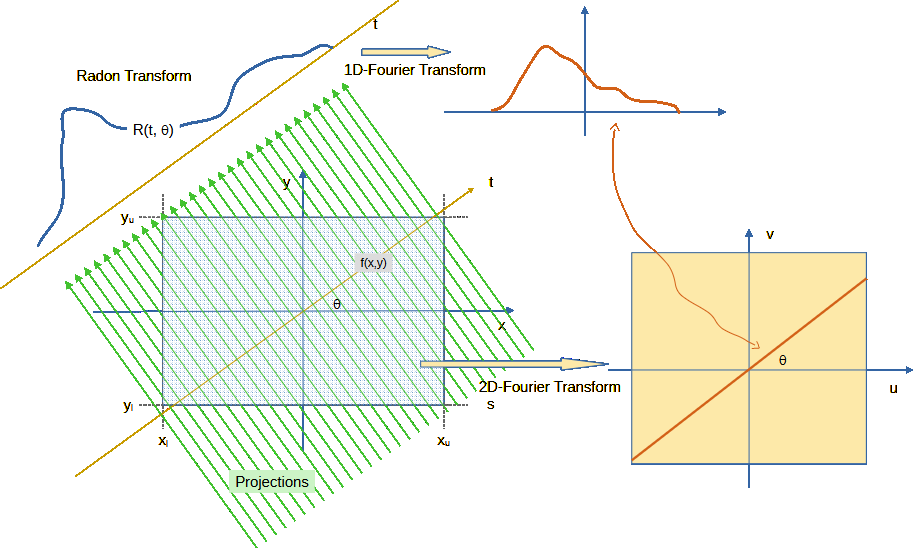


From `Medical Imaging Systems, An Introductory Guide; Publisher: Springer Open; Authors: A. Maier, S. Steidl, V. Christlein, J. Hornegger` is the following figure which is even more informative:

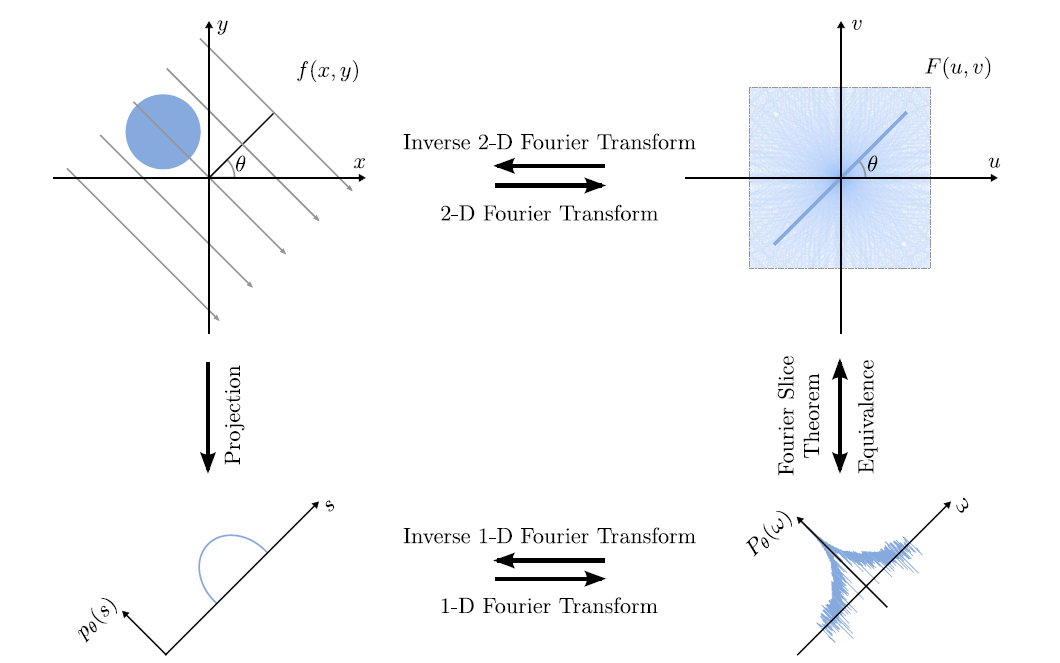

The figures provides the principle how to use the Radon transform to recover an image $f(x,\ y)$.

1) Get a sufficiently large number of Radon-Transforms for angles in $0 \le \theta \le \pi$

2) Transform each Radon Transform and map these values onto the $u,\ v$ plane. The values of Fourier transforms of the Radon-Transform are *radially* distributed over $u,\ v$

3) Interpolate the *radially* distributed values on a *rectangular* grid in the $u,\ v$ domain

4) Apply the inverse 2D Fourier transform to obtain an *approximation* of image $f(x,\ y)$


## How to compute the Radon Transform



## Inversion of the Radon Transform



The inverse 2D continous Fourier Transform yields the image $f(x,\ y)$ by evaluating the double integral


$$
f(x,\ y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,v) \cdot exp \left[j \cdot 2\pi \cdot \left(u \cdot x + v \cdot y \right) \right] \cdot du \cdot dv
$$

With a change from cartesian $(u,\ v)$ coordinates to polar coordinates $(S,\ \theta)$ and $-\infty \lt S \lt \infty;\ 0 \le \theta \lt \pi$

$$\begin{gather}
u = S \cdot cos(\theta) \\
v  = S \cdot sin(\theta)
\end{gather}
$$

the Jacobian matrix

$$
\frac{\partial uv}{\partial S\theta} = 
    \left[ {\begin{array}{cc}
    \frac{\partial u}{\partial S} & \frac{\partial u}{\partial \theta} \\
    \frac{\partial v}{\partial S} & \frac{\partial v}{\partial \theta}
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
    cos(\theta) & -S \cdot sin(\theta) \\
    sin(\theta) & S \cdot cos(\theta)
  \end{array} } \right]
$$

and its functional determinant

$$
det\left(\frac{\partial uv}{\partial S\theta}  \right) = S
$$

the differentials $du \cdot dv$ 

$$
du \cdot dv = |S| \cdot dS \cdot d\theta
$$

$$
f(x,\ y) = \int_{0}^{\pi} \int_{-\infty}^{\infty} F(S \cdot cos(\theta),\ S \cdot sin(\theta)) \cdot |S| \cdot exp \left[j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(\theta) + y \cdot sin(\theta)\right) \right] \cdot dS \cdot d\theta
$$

The product $F(S \cdot cos(\theta),\ S \cdot sin(\theta)) \cdot |S|$ can be be interpreted as a filter operation.

Recalling the `Central Slice Theorem` and introducing the notation $F_{Radon}(S, \theta)$ for the 1D Fourier transform of the Radon transform

$$
F_{Radon}(S, \theta) = F(S \cdot cos(\theta),\ S \cdot sin(\theta)) = \int_{-\infty}^{\infty} R(t, \theta) \cdot exp \left[-j \cdot 2\pi \cdot S \cdot t\right] \cdot dt
$$

permits to evaluate $f(x, y)$ like this

$$
f(x,\ y) = \int_{0}^{\pi} \int_{-\infty}^{\infty} F_{Radon}(S, \theta) \cdot |S| \cdot exp \left[j \cdot 2\pi \cdot S \cdot \left(x \cdot cos(\theta) + y \cdot sin(\theta)\right) \right] \cdot dS \cdot d\theta
$$

----

$F_{Radon}(S, \theta) \cdot |S| $ shall be denoted 

$$
G(S, \theta) = F_{Radon}(S, \theta) \cdot |S|
$$

Its inverse transform shall be denoted $g(t, \theta)$

$$
g(t, \theta) = \int_{-\infty}^{\infty} G(S, \theta) \cdot exp \left[j \cdot 2\pi \cdot S \cdot t \right] \cdot dS
$$

$$
f(x,\ y) = \int_{0}^{\pi} g(t=x \cdot cos(\theta) + y \cdot sin(\theta), \theta) \cdot d\theta
$$

The term $g(t=x \cdot cos(\theta) + y \cdot sin(\theta), \theta)$ is referred to as `filtered backprojection` at angle $\theta$. For a fixed value $t,\  \theta$ all points on the straight line $t=x \cdot cos(\theta) + y \cdot sin(\theta)$ are assigned the same value of the filtered projection $g(t, \theta)$. Summing (integration) over all these lines approximates the original image function $f(x,\ y)$


## Computational Issues

The article `Digital Reconstruction of Multidimensional Signals from their Projections; Authors: R.M. Mersereau , A.V. Oppenheim` provides many ideas how to evaluate the original image $f(x,\ y)$ from its projections. The article discusses two different approaches:

**Reconstruction using the Fourier Slice Theorem**

From the Fourier Sice Theorem it knowns that the 1D Fourier transform of a projection pertaining to angle $\theta$ are just values of the 2D Fourier transform along a slice $\left(u \cdot cos(\theta),\ v \cdot sin(\theta) \right)$. In any practical application we are dealing with discrete samples of the Fourier transform. Using all available projections and applying the discrete Fourier transform yields samples of the 2D Fourier transform in polar coordinates. Resampling from polar coordinates to cartesian coordinates using some appropriate interpolation methods gives the 2D Fourier transform in cartesian coordinates. Taking the inverse 2D Transform gives an approximation to $f(x,\ y)$.


**Reconstruction using Filtered Backprojection**

Adding up filtered projections $g(t, \theta)$ for all available projection angles $\theta$ is another way to compute an approximate representation of image function $f(x,\ y)$.

**Note**

The article `Digital Reconstruction of Multidimensional Signals from their Projections` does not deal with the reconstruction of $f(x,\ y)$ by iterativly solving a system of equations.




